# Mobile Prices Prediction_Project 4_Ajit_Kumar

## Importing major libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df=pd.read_csv("Processed_Flipdata - Processed_Flipdata.csv")
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


## Summarry of datasets

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


### Analysis-

Prize column is object type , need to convert into integer type

## Converting Prize column from Object type to integer type

In [4]:
df['Prize'] = df['Prize'].str.replace(',', '', regex=True)  # Remove any unwanted characters (like commas, currency symbols) 
df['Prize'] = pd.to_numeric(df['Prize'], errors='coerce') #convert to numeric

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [6]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


## Checking null values

In [7]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

### Analysis-

No null values found

In [8]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [9]:
c=df.corr()
c

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
Unnamed: 0,1.000000,0.120579,0.084103,-0.057136,-0.160373,0.015372,0.333940
Memory,0.120579,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.084103,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.057136,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.160373,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.015372,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Prize,0.333940,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


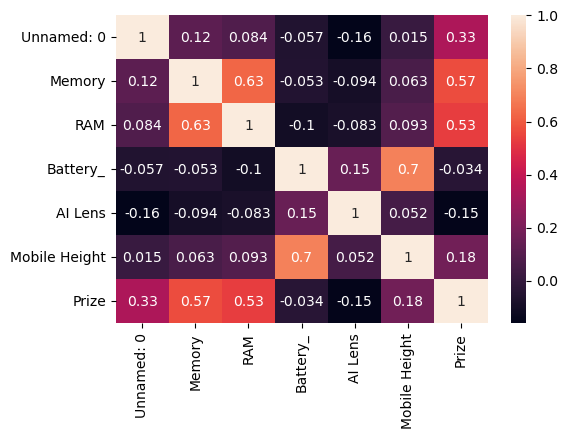

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(c,annot=True)
plt.show()

Analysis

Memory and RAM are more correlated to Price

In [11]:
df["Unnamed: 0"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<Axes: >

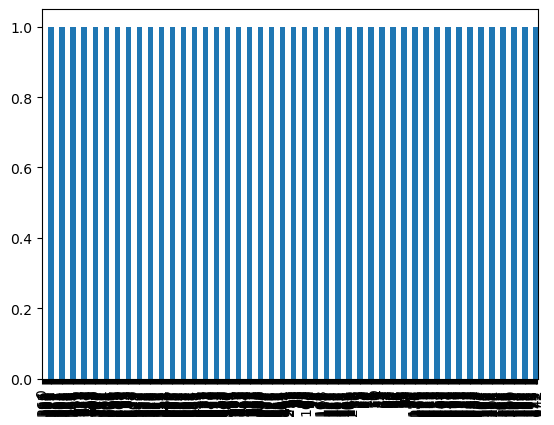

In [12]:
df["Unnamed: 0"].value_counts().plot(kind="bar")

### Analysis - 

Unnamed column can be dropped as there is no standard value available

In [13]:
df["Model"].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [14]:
df["Model"].value_counts()

vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: Model, Length: 187, dtype: int64

In [15]:
df["Colour"].value_counts()


Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: Colour, Length: 275, dtype: int64

In [16]:
df["Mobile Height"].value_counts()

16.76    126
16.51     64
16.94     53
17.02     36
16.71     34
16.56     22
16.36     21
16.66     20
16.64     20
17.07     17
16.26     14
16.59     12
17.22     11
16.54     10
17.32     10
16.33      9
16.21      8
4.50       7
17.04      6
15.49      6
6.10       5
16.43      4
16.81      3
16.00      3
15.60      2
13.84      2
16.55      2
4.57       2
41.94      2
16.69      2
17.65      1
17.53      1
15.46      1
15.80      1
15.70      1
7.11       1
5.08       1
12.70      1
Name: Mobile Height, dtype: int64

In [17]:
df["AI Lens"].value_counts()

0    507
1     34
Name: AI Lens, dtype: int64

In [18]:
df["Battery_"].value_counts()

5000    389
6000     42
4500     26
5080      6
4980      6
4300      5
4200      5
4400      5
800       5
1000      4
4700      4
1020      3
4830      3
4600      3
4270      3
4323      3
4050      2
5020      2
3000      2
5200      2
4800      2
4610      2
4020      2
4410      2
4000      1
4030      1
4115      1
3300      1
3110      1
1500      1
1200      1
2550      1
1900      1
7000      1
2815      1
3900      1
3100      1
Name: Battery_, dtype: int64

<Axes: >

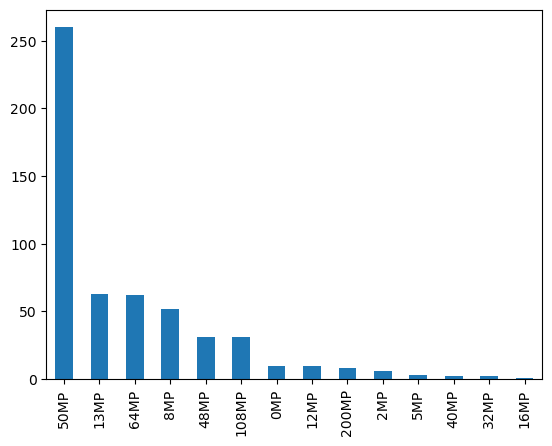

In [19]:
df["Rear Camera"].value_counts().plot(kind='bar')

<Axes: >

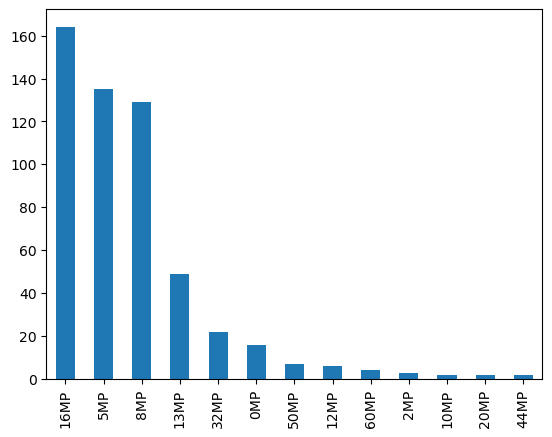

In [20]:
df["Front Camera"].value_counts().plot(kind="bar")

In [21]:
df["Processor_"].value_counts()

Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: Processor_, Length: 123, dtype: int64

<Axes: >

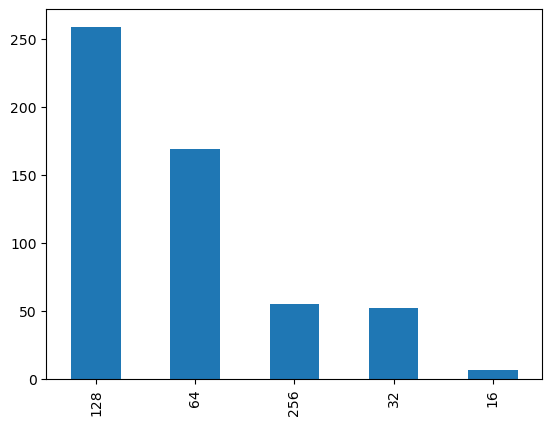

In [22]:
df["Memory"].value_counts().plot(kind="bar")

In [23]:
#Pairplot

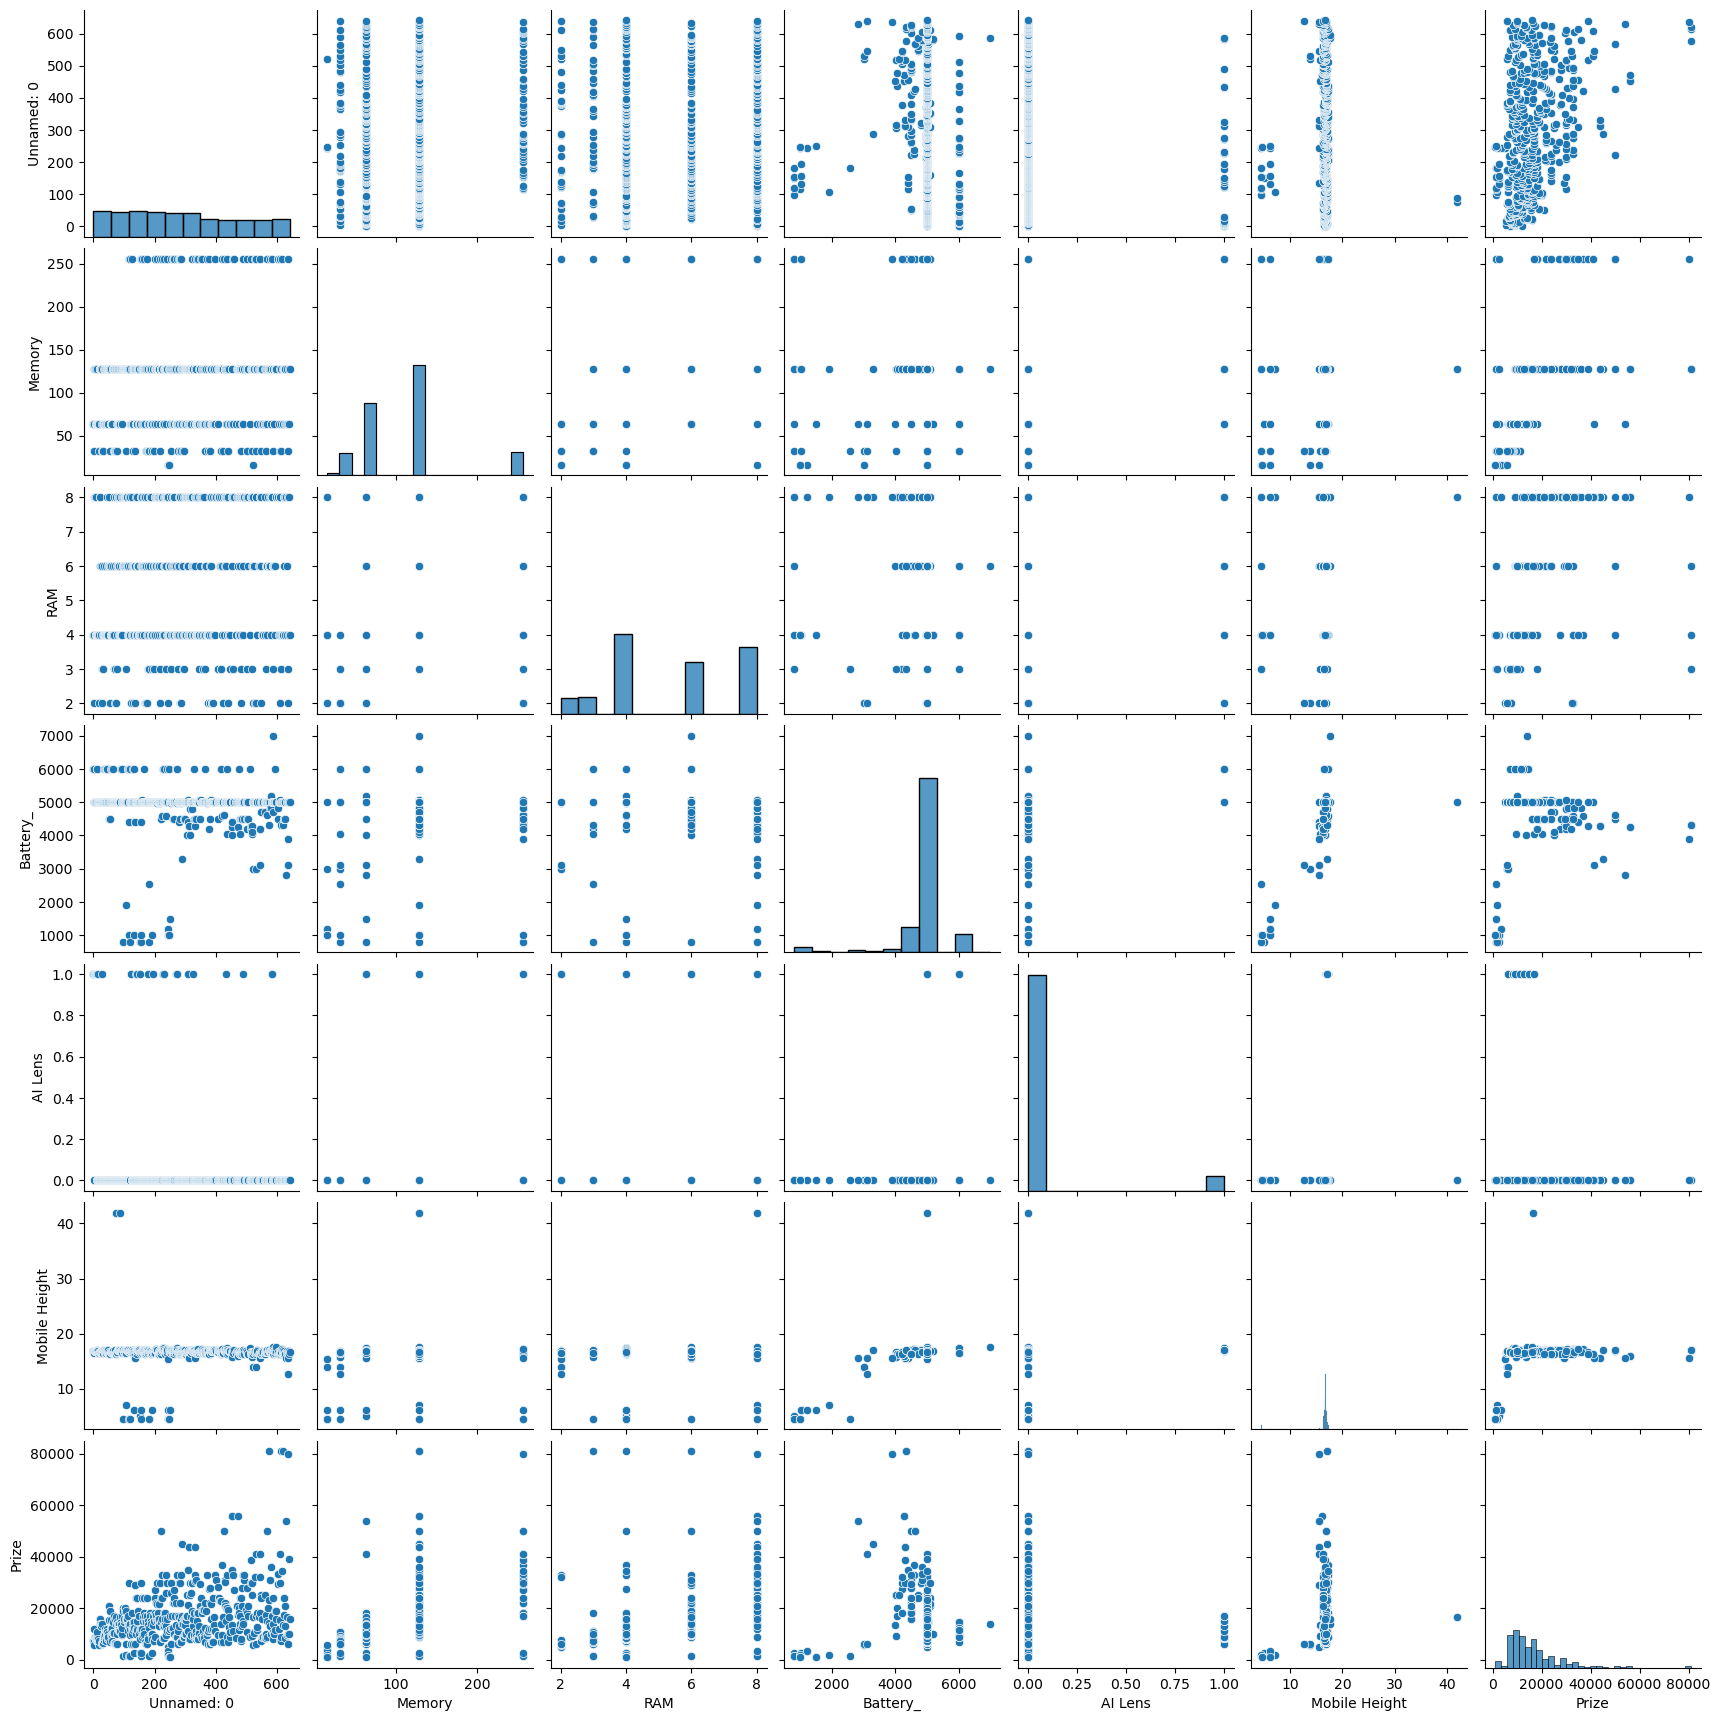

In [24]:
sns.pairplot(df)

# Putting all Numerical columns and Categorical columns in seperately to check correlation

In [25]:
num_data=df[["Memory","RAM","Battery_",'AI Lens','Mobile Height',"Prize"]]
num_data

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...
536,256,8,3900,0,15.49,79999
537,32,2,3100,0,12.70,5998
538,64,4,5000,0,16.76,9990
539,128,8,5000,0,16.26,38999


In [26]:
categorical_data=df[['Model','Colour','Rear Camera', 'Front Camera', 'Processor_',
       'Prize']]
categorical_data

,Model,Colour,Rear Camera,Front Camera,Processor_,Prize
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,50MP,5MP,G37,8999
...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,5MP,2MP,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core",38999


In [27]:
categorical_data.columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_',
       'Prize'],
      dtype='object')

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
#Importing label encoder to handle categorical columns

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [30]:
categorical_data['Model']= label_encoder.fit_transform(categorical_data['Model']) 
categorical_data['Colour']= label_encoder.fit_transform(categorical_data['Colour']) 
categorical_data['Rear Camera']= label_encoder.fit_transform(categorical_data['Rear Camera']) 
categorical_data['Front Camera']= label_encoder.fit_transform(categorical_data['Front Camera']) 
categorical_data['Processor_']= label_encoder.fit_transform(categorical_data['Processor_']) 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_data.columns:
  categorical_data[i]=le.fit_transform(categorical_data[i])

In [31]:
categorical_data

,Model,Colour,Rear Camera,Front Camera,Processor_,Prize
0,23,159,3,10,113,7299
1,23,20,3,10,113,7299
2,37,149,10,4,75,11999
3,69,201,13,10,56,5649
4,12,130,10,10,14,8999
...,...,...,...,...,...,...
536,118,49,10,2,89,79999
537,32,52,11,6,68,5998
538,123,259,10,12,35,9990
539,110,17,10,7,11,38999


In [32]:
num_data.columns

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

In [33]:
categorical_data.columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_',
       'Prize'],
      dtype='object')

# Changing column names

In [34]:
num_data.rename(columns={"Memory":"Storage Capacity",'Battery_':'Battery','Mobile Height':'Screen Size','Prize':'Price'}
                ,inplace=True)
num_data.head()

,Storage Capacity,RAM,Battery,AI Lens,Screen Size,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999


In [35]:
categorical_data.rename(columns={'Colour':"Color",'Processor_':'Processor','Prize':'Price'},inplace=True)
categorical_data.head()

,Model,Color,Rear Camera,Front Camera,Processor,Price
0,23,159,3,10,113,7299
1,23,20,3,10,113,7299
2,37,149,10,4,75,11999
3,69,201,13,10,56,5649
4,12,130,10,10,14,8999


# Checking Correlation

### Correaltion with numerical dataset

In [36]:
c_num=num_data.corr()
c_num

,Storage Capacity,RAM,Battery,AI Lens,Screen Size,Price
Storage Capacity,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Screen Size,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Price,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


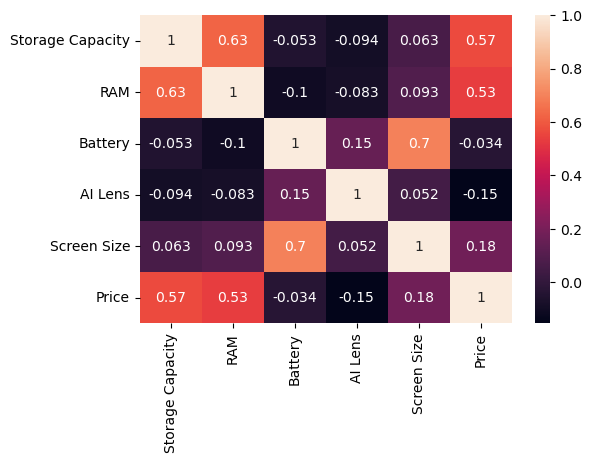

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(c_num,annot=True)
plt.show()

### Analysis

RAM and Storage capacity has mid level coorelation with Price

### Correlation with categorical dataset

In [38]:
c_cat=categorical_data.corr()
c_cat

,Model,Color,Rear Camera,Front Camera,Processor,Price
Model,1.000000,0.106594,0.046810,-0.082802,0.036362,-0.075163
Color,0.106594,1.000000,0.068766,-0.005653,-0.068677,0.038895
Rear Camera,0.046810,0.068766,1.000000,0.111926,-0.032366,-0.019597
Front Camera,-0.082802,-0.005653,0.111926,1.000000,-0.124950,-0.333833
Processor,0.036362,-0.068677,-0.032366,-0.124950,1.000000,-0.050244
Price,-0.075163,0.038895,-0.019597,-0.333833,-0.050244,1.000000


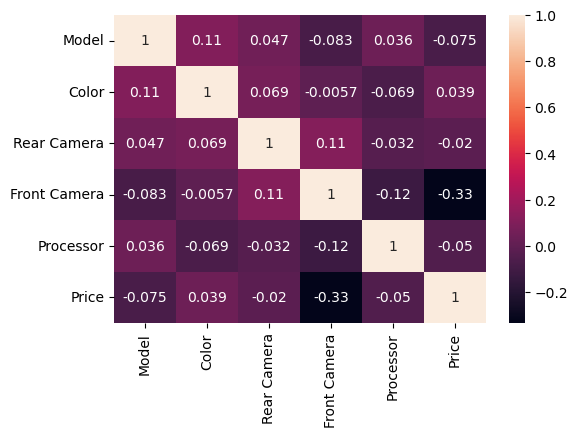

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(c_cat,annot=True)
plt.show()

### Analysis

No columns has mid or strong level correlation with Price

### Pairplot of Numerical data

<Figure size 1600x1200 with 0 Axes>

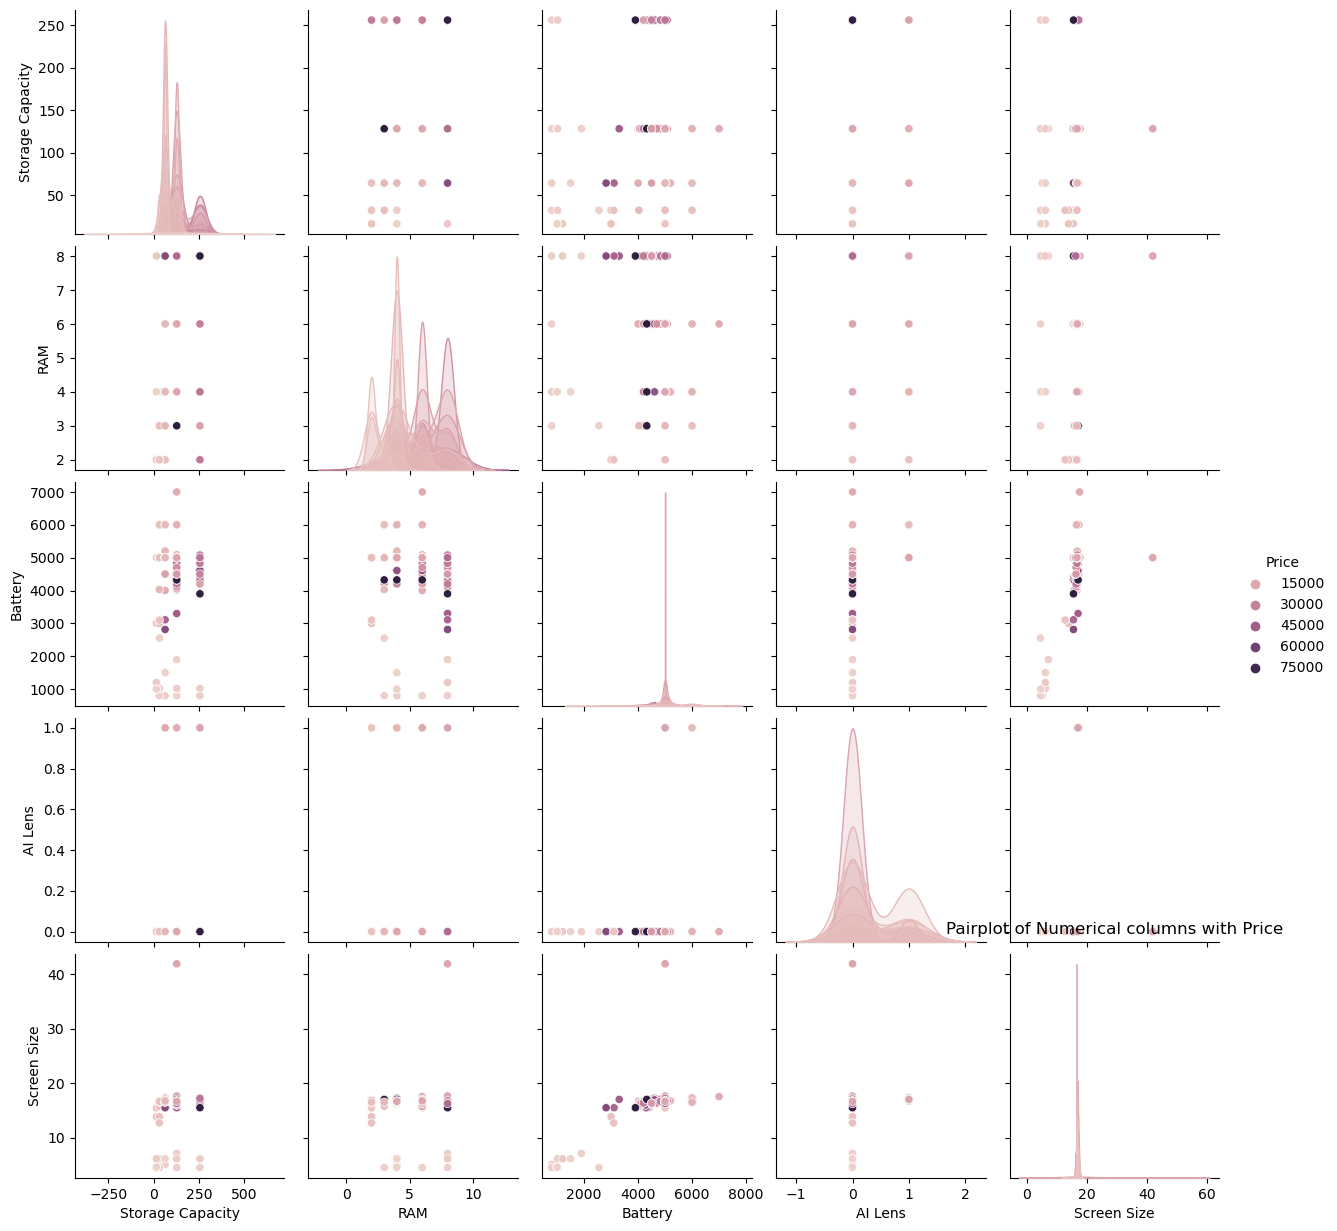

In [40]:
plt.figure(figsize=(16,12))
sns.pairplot(num_data,hue="Price")
plt.title("Pairplot of Numerical columns with Price",y=1.05)
plt.show()

# Multivariance analysis of Numerical and Categorical data

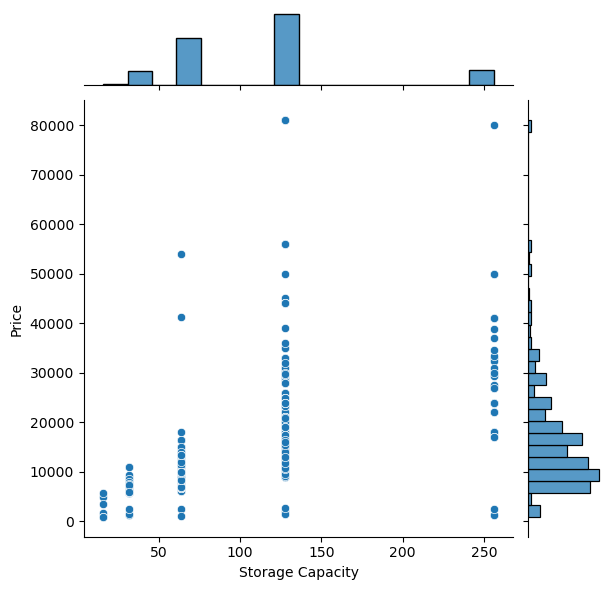

In [41]:
sns.jointplot(x='Storage Capacity',y="Price",data=num_data)

### Analysis

Mobile phones with 128 GB and 256 GB has highest price tag

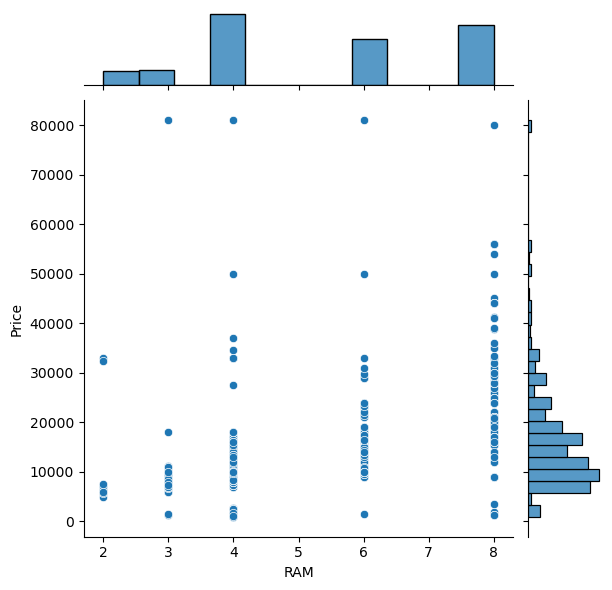

In [42]:
sns.jointplot(x='RAM',y="Price",data=num_data)

### Analysis

Phones with 8GB RAM has highest price

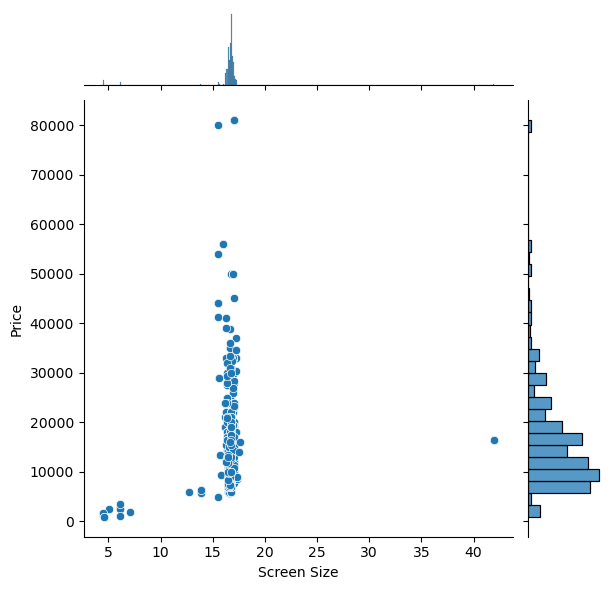

In [43]:
sns.jointplot(x='Screen Size',y="Price",data=num_data)

### Analysis

Mobile screen size is in range of 15-18

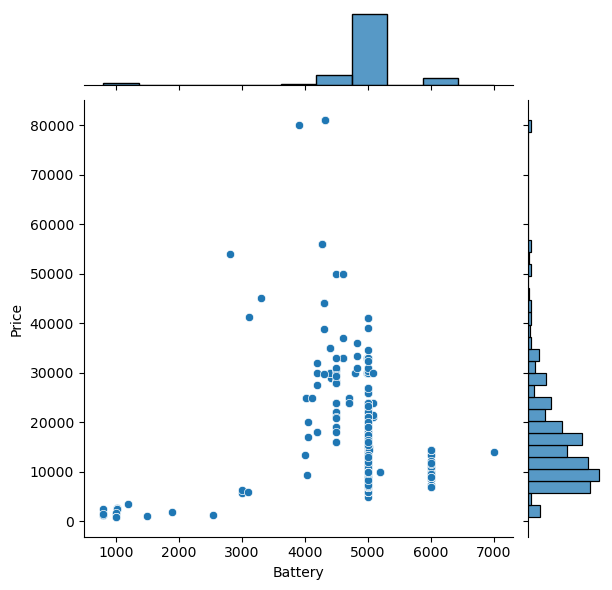

In [44]:
sns.jointplot(x='Battery',y="Price",data=num_data)

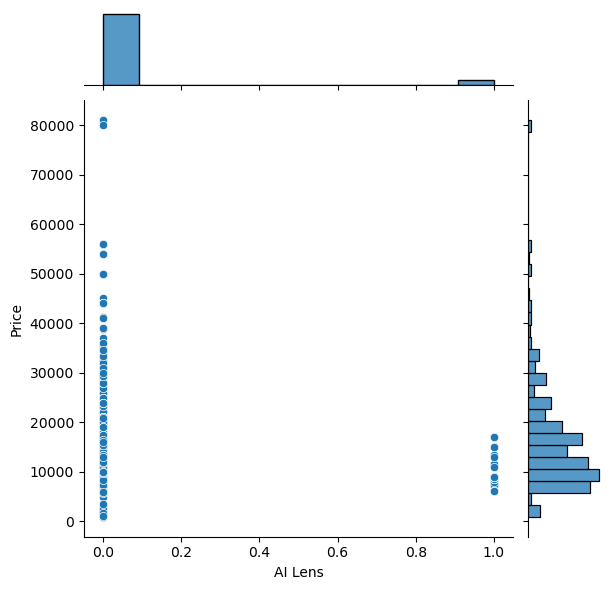

In [45]:
sns.jointplot(x='AI Lens',y="Price",data=num_data)

### Analysis

Most phones have zero AI Lens

<Axes: xlabel='Storage Capacity', ylabel='Price'>

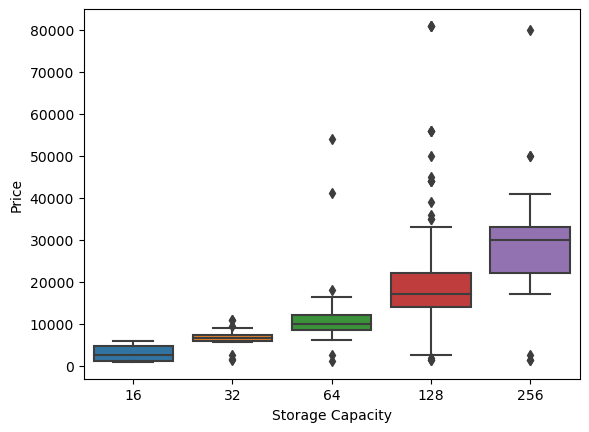

In [46]:
sns.boxplot(x='Storage Capacity',y="Price",data=num_data)

### Analysis

Phones with capacity of 256 GB has highest prices. 
Second highest is of 128 GB storag capacity. 
There are some outliers with 128 GB which have highest prices.

<Axes: xlabel='RAM', ylabel='Price'>

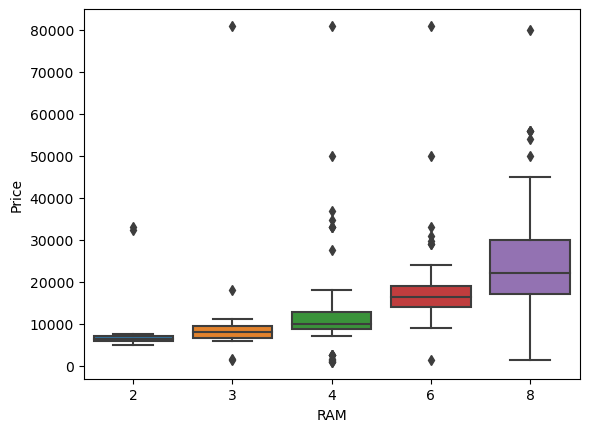

In [47]:
sns.boxplot(x='RAM',y="Price",data=num_data)

### Analysis

8GB RAM has highest prices.

<Axes: xlabel='Screen Size', ylabel='Price'>

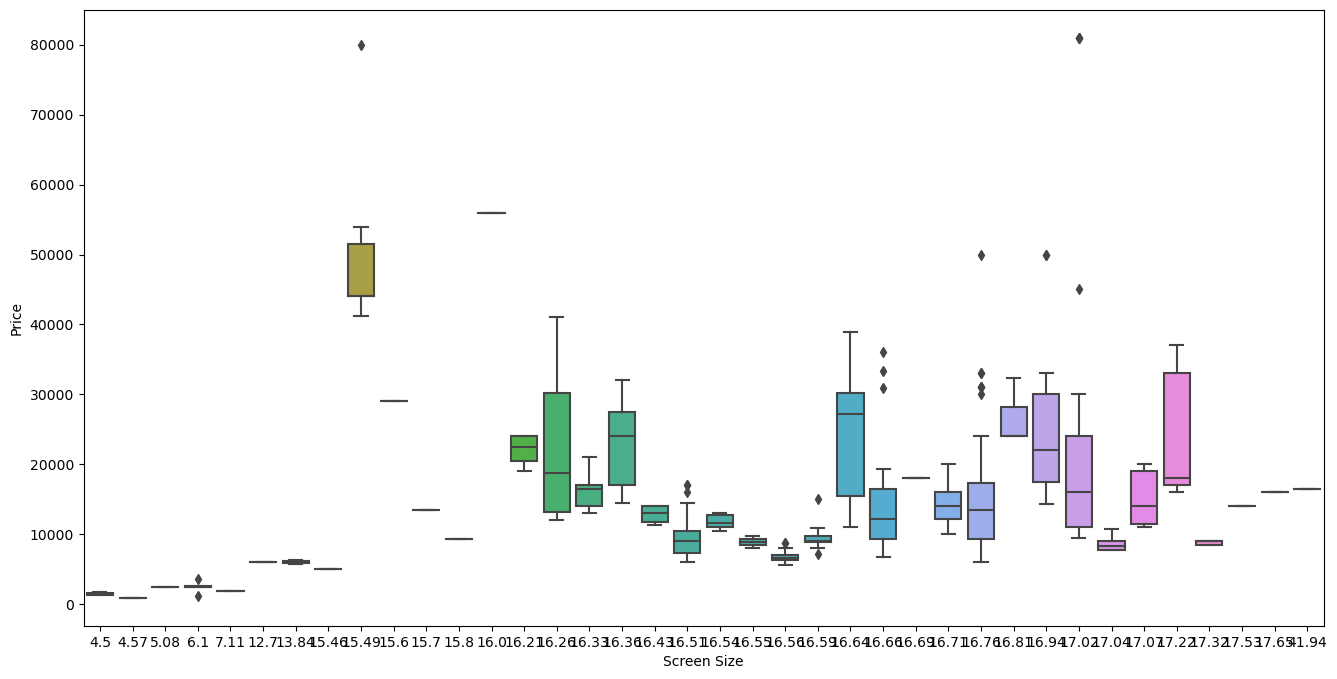

In [48]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Screen Size',y="Price",data=num_data)

### Analysis 

Very less mobile phones below 15 screnn size

<Axes: xlabel='Battery', ylabel='Price'>

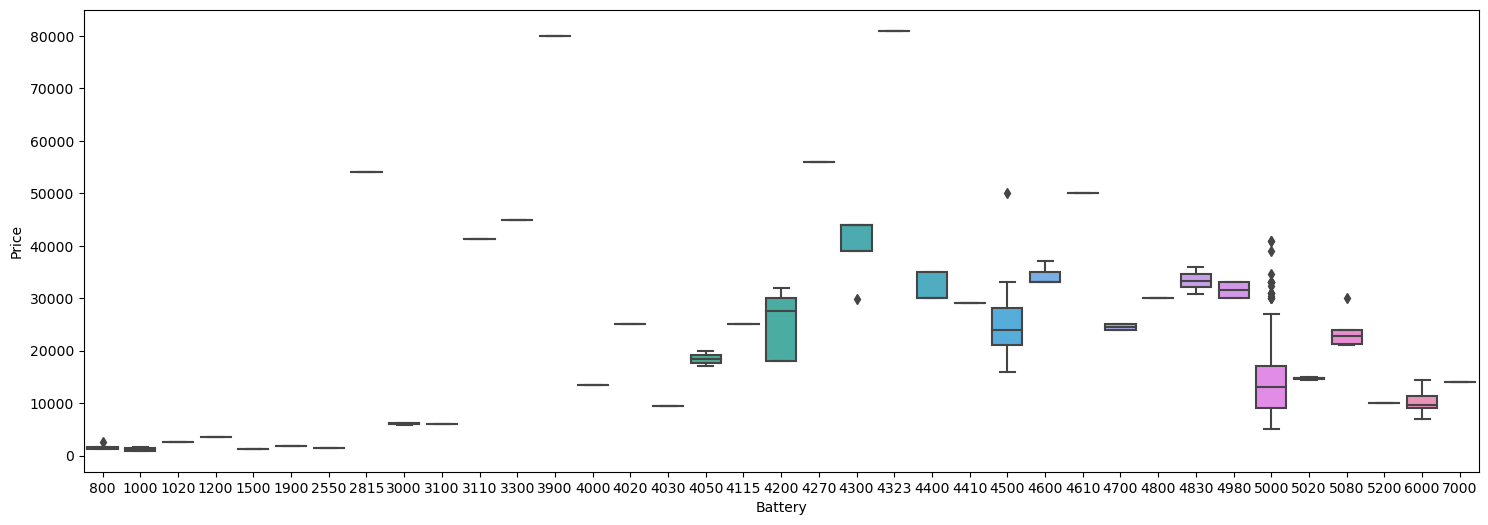

In [49]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Battery',y="Price",data=num_data)

### Analysis

Very less phones below 4000 capacity.

<Axes: xlabel='AI Lens', ylabel='Price'>

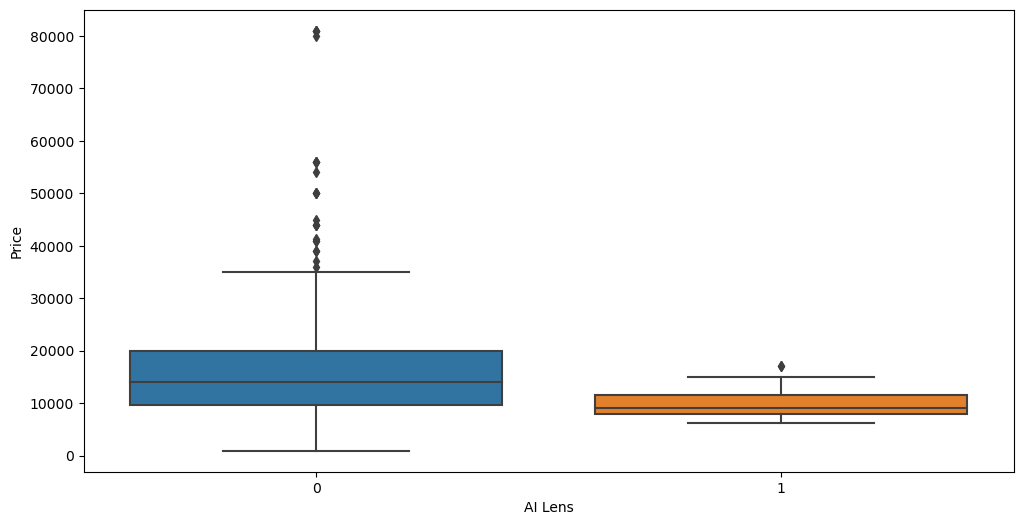

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='AI Lens',y="Price",data=num_data)

### Pairplot of Categorical data

<Figure size 1600x1200 with 0 Axes>

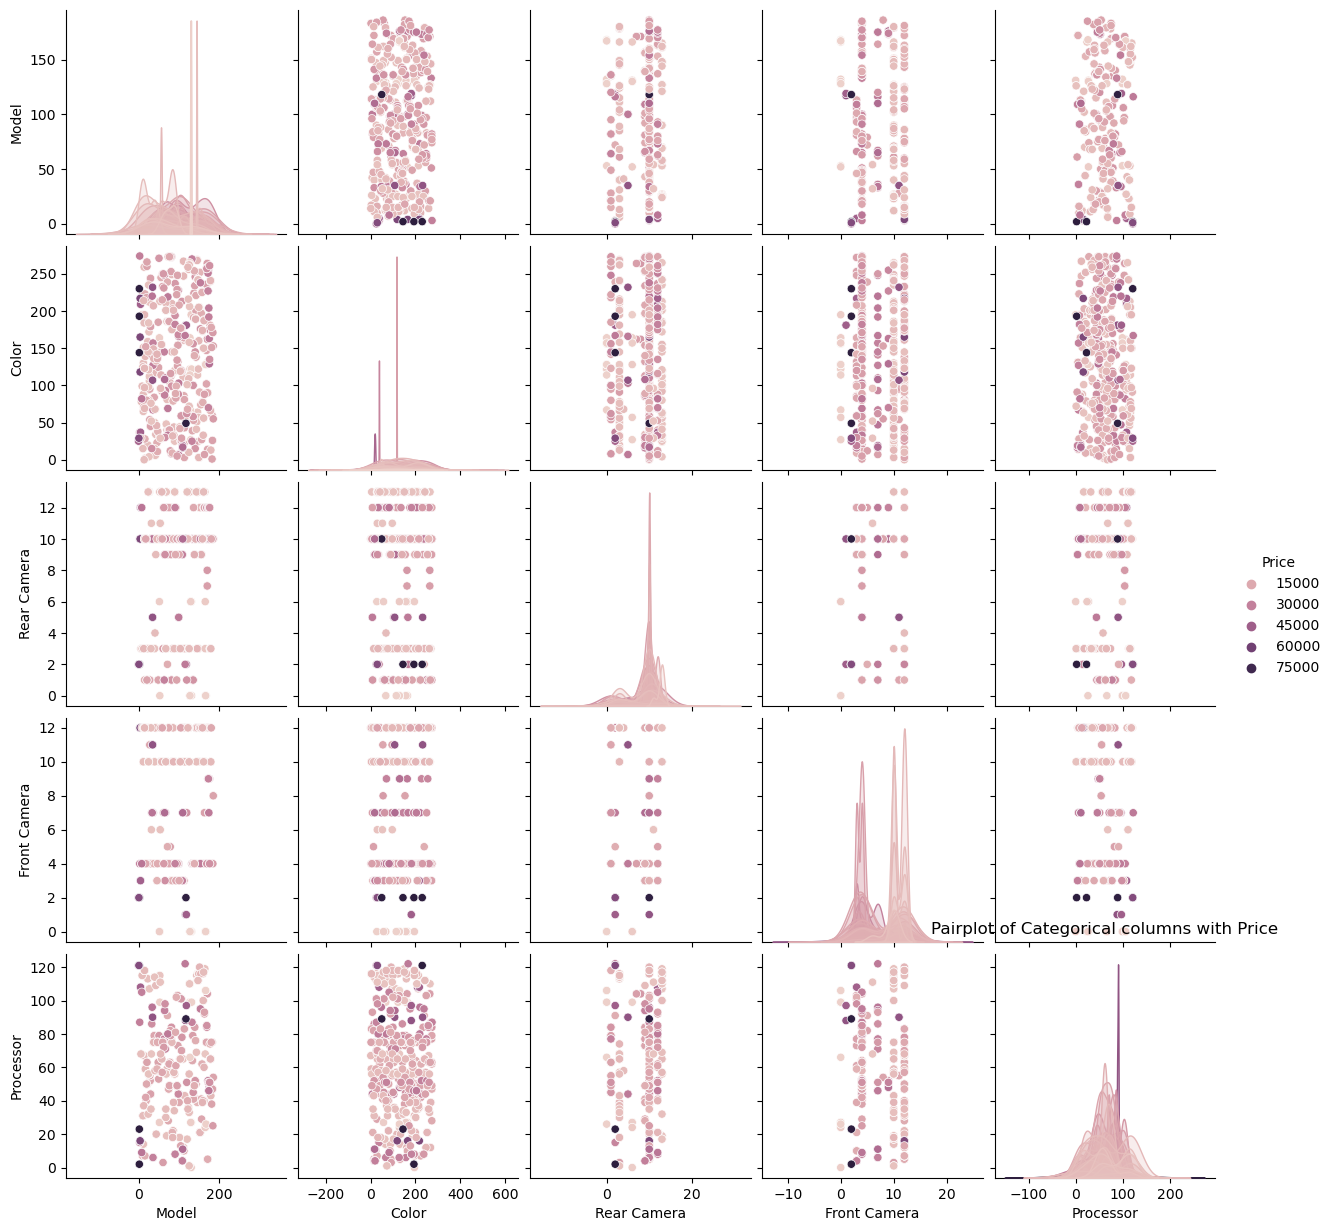

In [51]:
plt.figure(figsize=(16,12))
sns.pairplot(categorical_data,hue="Price")
plt.title("Pairplot of Categorical columns with Price",y=1.05)
plt.show()

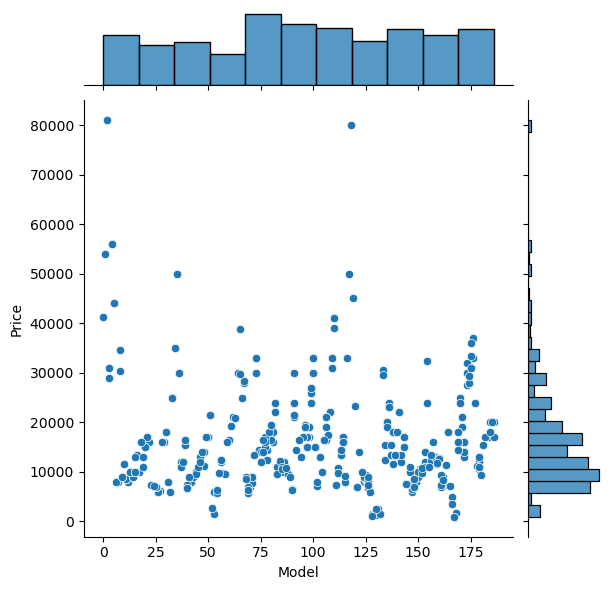

In [52]:
sns.jointplot(x='Model',y="Price",data=categorical_data)

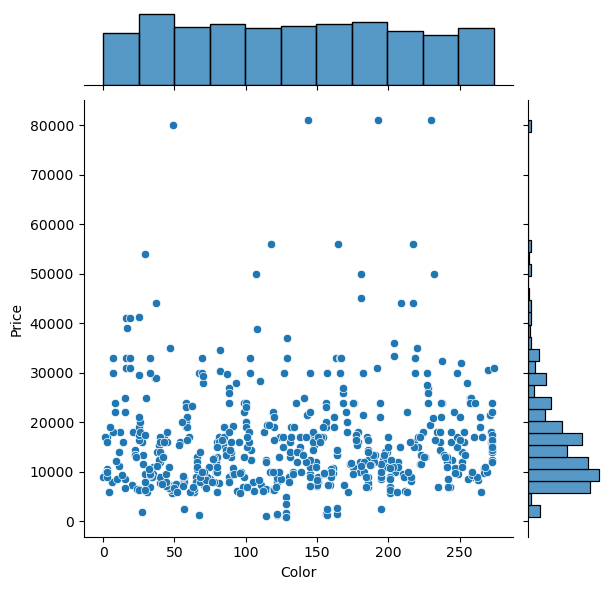

In [53]:
sns.jointplot(x='Color',y="Price",data=categorical_data)

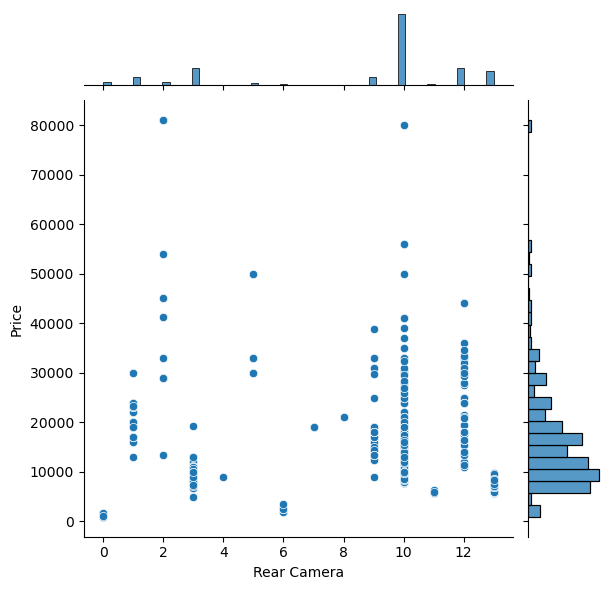

In [54]:
sns.jointplot(x='Rear Camera',y="Price",data=categorical_data)

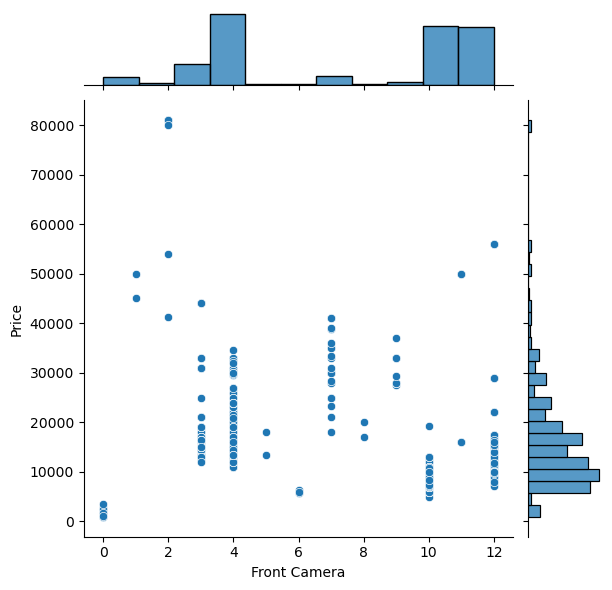

In [55]:
sns.jointplot(x='Front Camera',y="Price",data=categorical_data)

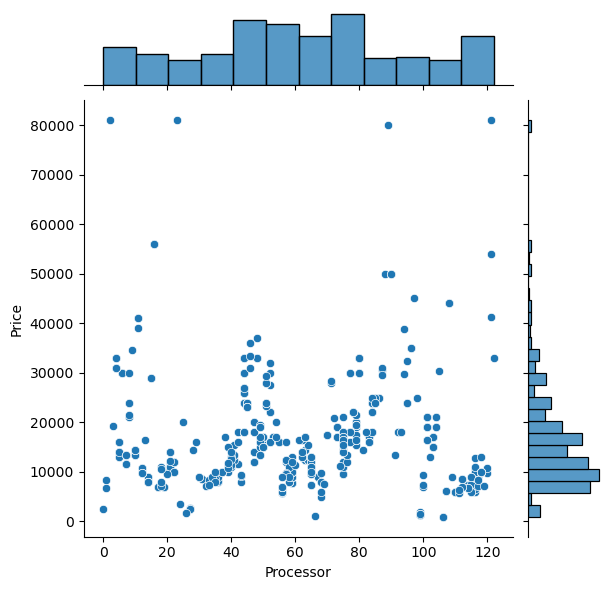

In [56]:
sns.jointplot(x='Processor',y="Price",data=categorical_data)

## Dropping unncessary columns in df dataset

In [57]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [58]:
df1=df.drop(['Unnamed: 0'],axis=1)
df1.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


## Pairplot of new dataset

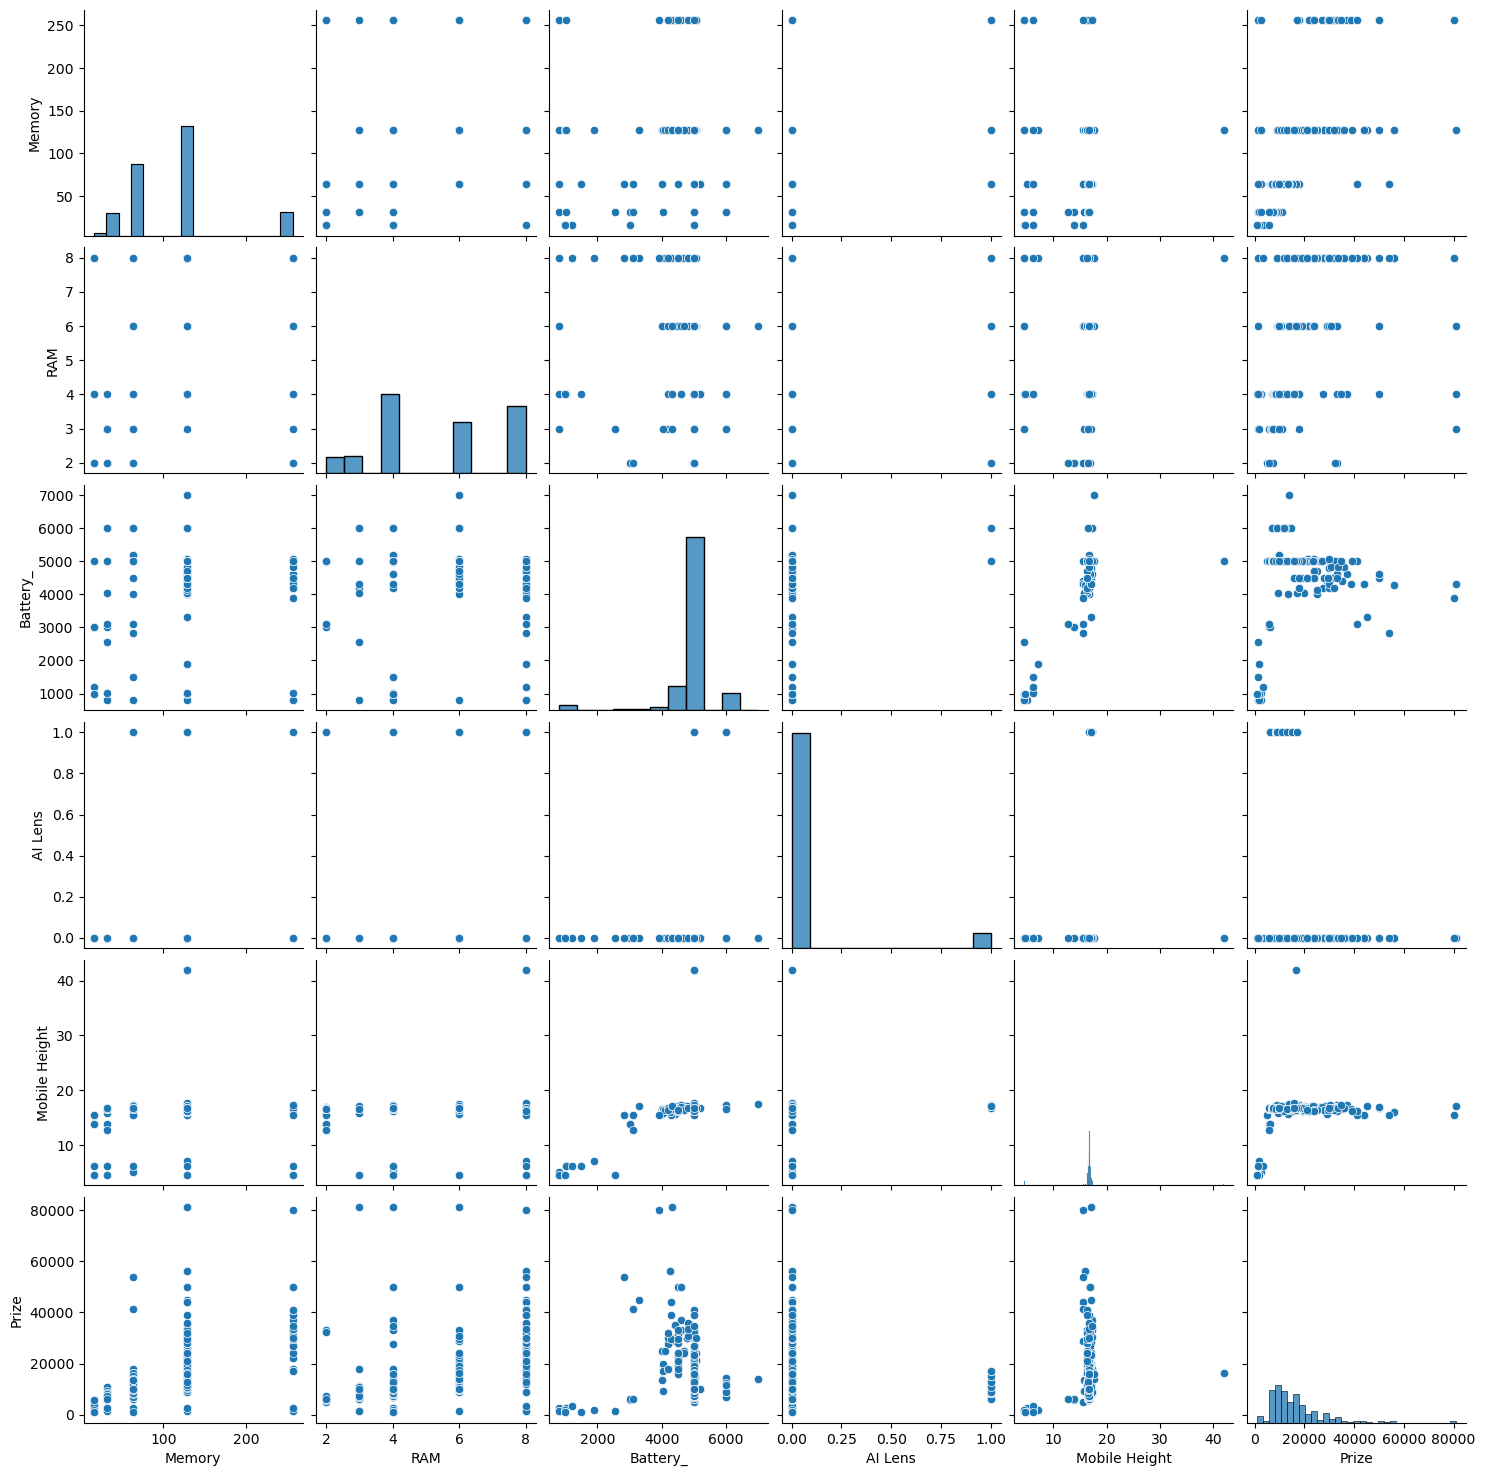

In [59]:
sns.pairplot(df1)

In [60]:
df1.rename(columns={"Memory":"Storage Capacity",'Battery_':'Battery','Mobile Height':'Screen Size','Colour':"Color",'Processor_':'Processor','Prize':'Price'}
                ,inplace=True)
df1.head()

,Model,Color,Storage Capacity,RAM,Battery,Rear Camera,Front Camera,AI Lens,Screen Size,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


## Importing Label Encoder to handle categorical data

In [61]:
from sklearn import preprocessing

In [62]:
label_encoder = preprocessing.LabelEncoder()

In [63]:
df1['Model']= label_encoder.fit_transform(df1['Model']) 
df1['Color']= label_encoder.fit_transform(df1['Color']) 
df1['Rear Camera']= label_encoder.fit_transform(df1['Rear Camera']) 
df1['Front Camera']= label_encoder.fit_transform(df1['Front Camera']) 
df1['Processor']= label_encoder.fit_transform(df1['Processor']) 

In [64]:
df1.head()

,Model,Color,Storage Capacity,RAM,Battery,Rear Camera,Front Camera,AI Lens,Screen Size,Processor,Price
0,23,159,64,4,6000,3,10,1,16.76,113,7299
1,23,20,64,4,6000,3,10,1,16.76,113,7299
2,37,149,128,8,5000,10,4,0,16.64,75,11999
3,69,201,32,2,5000,13,10,0,16.56,56,5649
4,12,130,128,8,5000,10,10,1,16.76,14,8999


Categorical columns have been converted into numerical values after applying label encoder

In [65]:
df1.corr()

,Model,Color,Storage Capacity,RAM,Battery,Rear Camera,Front Camera,AI Lens,Screen Size,Processor,Price
Model,1.000000,0.106594,0.036055,0.005924,-0.090875,0.046810,-0.082802,-0.396336,-0.135728,0.036362,-0.075163
Color,0.106594,1.000000,0.042121,0.064503,0.027350,0.068766,-0.005653,-0.030308,0.016014,-0.068677,0.038895
Storage Capacity,0.036055,0.042121,1.000000,0.625284,-0.053210,-0.021172,-0.380910,-0.094442,0.063163,-0.149665,0.566660
RAM,0.005924,0.064503,0.625284,1.000000,-0.104923,-0.024422,-0.435425,-0.082622,0.092951,-0.108733,0.532024
Battery,-0.090875,0.027350,-0.053210,-0.104923,1.000000,0.255043,0.405750,0.150156,0.695641,-0.136305,-0.034297
Rear Camera,0.046810,0.068766,-0.021172,-0.024422,0.255043,1.000000,0.111926,-0.019088,0.242702,-0.032366,-0.019597
Front Camera,-0.082802,-0.005653,-0.380910,-0.435425,0.405750,0.111926,1.000000,0.156066,0.237706,-0.124950,-0.333833
AI Lens,-0.396336,-0.030308,-0.094442,-0.082622,0.150156,-0.019088,0.156066,1.000000,0.052018,-0.112740,-0.153691
Screen Size,-0.135728,0.016014,0.063163,0.092951,0.695641,0.242702,0.237706,0.052018,1.000000,-0.036817,0.176009
Processor,0.036362,-0.068677,-0.149665,-0.108733,-0.136305,-0.032366,-0.124950,-0.112740,-0.036817,1.000000,-0.050244


# Feature Extraction

In [66]:
#importing libraries for feature extraction

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [68]:
X=df1.iloc[:,0:10]  #Independnet variable columns
y=df1.iloc[:,[-1]]  #Target variable column

In [69]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [70]:
df1scores=pd.DataFrame(fit.scores_)
df1columns=pd.DataFrame(X.columns)

# Concat two dataframes for better visualization

featureScores=pd.concat([df1columns,df1scores],axis=1)
featureScores.columns=["Specs","Score"] #naming the dataframe columns
featureScores

,Specs,Score
0,Model,7643.151931
1,Color,7826.116297
2,Storage Capacity,14126.732211
3,RAM,305.284365
4,Battery,61410.920261
5,Rear Camera,505.284436
6,Front Camera,694.320316
7,AI Lens,212.897549
8,Screen Size,144.142050
9,Processor,4987.548952


In [71]:
print(featureScores.nlargest(4,'Score')) #print 4 best features


              Specs         Score
4           Battery  61410.920261
2  Storage Capacity  14126.732211
1             Color   7826.116297
0             Model   7643.151931


In [72]:
#creating Extra tree calssifier instance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.19076959 0.10140838 0.0708357  0.09717272 0.064296   0.08696545
 0.07568802 0.0160345  0.12735419 0.16947545]


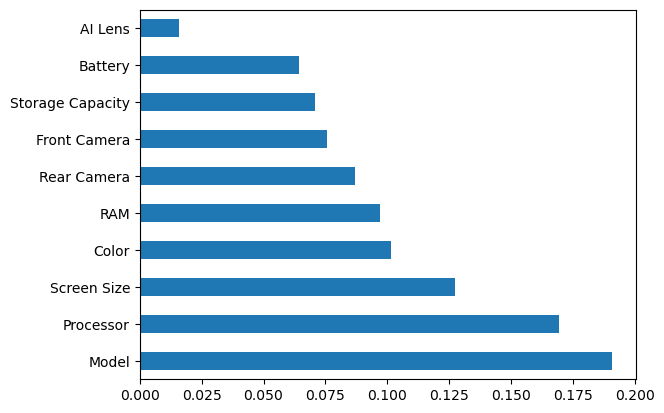

In [73]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers


# Plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

### Splitting the data into X (Independent variable) and y (Target variable)

In [74]:
#independent variable
X=df1.drop(['Price'],axis=1)
X

,Model,Color,Storage Capacity,RAM,Battery,Rear Camera,Front Camera,AI Lens,Screen Size,Processor
0,23,159,64,4,6000,3,10,1,16.76,113
1,23,20,64,4,6000,3,10,1,16.76,113
2,37,149,128,8,5000,10,4,0,16.64,75
3,69,201,32,2,5000,13,10,0,16.56,56
4,12,130,128,8,5000,10,10,1,16.76,14
...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,10,2,0,15.49,89
537,32,52,32,2,3100,11,6,0,12.70,68
538,123,259,64,4,5000,10,12,0,16.76,35
539,110,17,128,8,5000,10,7,0,16.26,11


In [75]:
#Target or dependent variable
y=df1["Price"]
y

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Price, Length: 541, dtype: int64

In [77]:
X.shape,y.shape

((541, 10), (541,))

### Splitting the data into Train and Test 

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Train Test Data Split

In [80]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape


((432, 10), (109, 10), (109,), (432,))

## 1- Linear regression

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()
lr.fit(X_train,y_train)
#creating instance

LinearRegression()

In [251]:
##Fitting the model

In [83]:
lr.fit(X_train,y_train)


LinearRegression()

In [253]:
#prediction

In [84]:
z=lr.predict(X_test)
z

array([ 7315.91844209,  6940.36903452, 22464.68774013, 10571.74888937,
       13105.12950459, 17555.6265106 ,  9187.60842362, 14873.67613716,
       21422.01534293, 11160.84528439, 18019.53064055, 31914.56203221,
       22467.26644427, 58576.80836464, 24865.01953174, 16171.00677317,
       14839.5500488 , 23228.01852299, 20689.99157897, 17717.68970403,
       10778.48067745, 20988.64422068,  8666.71018883, 18978.17852585,
       23283.83443562, 23428.91731875,  6267.29453986, 22045.04259764,
       10204.24261534, 11154.17868963, 16558.34562164, 17223.0099571 ,
        2061.49183632, 20768.62873919, 22082.45168885, 21593.61849444,
        8481.04812761, 20700.80567145, 16330.88642939,  6258.32428515,
       16786.6729683 , 27589.45112904, 20490.47678755, 14405.50700891,
        8626.43053923, 19560.417456  , 27188.94025072, 17931.75650026,
       11603.39431444,  8240.86422844, 16918.30232837, 26321.08570931,
       13672.59709992,  9170.11209708,  8573.96671087, 16684.39563369,
      

In [ ]:
#Predicted Price vs actual price

In [85]:
ypred_vs_ytest={'Actual price':y_test,"Predicted price":z}
pd.DataFrame(ypred_vs_ytest)

,Actual price,Predicted price
229,8499,7315.918442
73,6299,6940.369035
352,19499,22464.687740
86,10999,10571.748889
470,12599,13105.129505
...,...,...
148,9999,13359.366285
46,7999,11806.661389
93,9999,11884.708691
407,8999,11711.317058


#Accuracy Check

In [255]:
#from sklearn.metrics import accuracy_score

In [256]:
##accuracy_score(y_test,z)

## Training accuracy

In [86]:
lr_train_acc=lr.score(X_train,y_train)
lr_train_acc

0.4487108625580263

## Testing accuracy

In [87]:
lr_test_acc=lr.score(X_test,y_test)
lr_test_acc

0.3206645632601707

### KPI metrics

In [88]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

In [89]:
#r2_score
lr_r2=r2_score(y_test,z)
lr_r2

0.3206645632601707

In [90]:
#mean absolute error
lr_mae=mean_absolute_error(y_test,z)
lr_mae

4601.918779350488

In [91]:
#mean sqaured error
lr_mse=mean_squared_error(y_test,z)
lr_mse

93631304.64628617

In [92]:
lr_accuracy={"Train data accuracy":lr.score(X_train,y_train),"Testing data accuracy":lr.score(X_test,y_test)}
lr_accuracy

{'Train data accuracy': 0.4487108625580263,
 'Testing data accuracy': 0.3206645632601707}

# 2- Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [265]:
#creating instance

In [94]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [267]:
##Fitting the model

In [95]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [269]:
#prediction

In [96]:
y_predict_log_reg=log_reg.predict(X_test)
y_predict_log_reg

array([ 8999,  9999, 15999, 11999, 23999, 15999, 12499, 23999, 16999,
        8999, 15999, 29999, 15999, 15999, 32999, 23999,  9999, 14499,
       23999, 14499,  8999, 23999, 18999, 23999, 15999, 15999,  9999,
       23999,  9999, 11999, 16999, 16999, 12999, 14999, 32999, 43999,
       18999, 14499, 23999,  8999, 15999, 29999, 23999, 16999,  7999,
       23999, 29999, 15999,  8999,  9999, 23999, 32999,  8999,  8999,
       18999,  7299, 23999, 23999,  8999, 15999,  8999, 15999,  6999,
       32999,  9999, 10999, 15999, 13999,  8999, 13999,  8999, 15999,
       29999, 10999,  7299, 23999, 20999, 23999, 32999, 23999,  9999,
        9499, 11999,  9999,  9999,  8999, 23999, 23999, 16999, 13999,
       13999, 13999, 29999,  9499, 12499,  9999, 32999,  9499, 23999,
       18999, 10999,  8999,  9499, 29999,  8999,  7999, 10999,  8999,
       20999], dtype=int64)

In [ ]:
#Predicted Price vs actual price

In [97]:
log_p_a={'Actual price':y_test,"Predicted price":y_predict_log_reg}
pd.DataFrame(log_p_a)

,Actual price,Predicted price
229,8499,8999
73,6299,9999
352,19499,15999
86,10999,11999
470,12599,23999
...,...,...
148,9999,8999
46,7999,7999
93,9999,10999
407,8999,8999


### Accuracy check

#### Train accuracy

In [98]:
log_train_acc=log_reg.score(X_train,y_train)
log_train_acc


0.12962962962962962

#### Test accuracy

In [99]:
log_test_acc=log_reg.score(X_test,y_test)
log_test_acc

0.11926605504587157

### KPI metrics 

In [100]:
#r2score
log_r2=(r2_score(y_test,y_predict_log_reg))
log_r2

0.451725945908513

In [101]:
#mae
log_mae=(mean_absolute_error(y_test,y_predict_log_reg))
log_mae

5231.816513761468

In [102]:
#mse
log_mse=(mean_squared_error(y_test,y_predict_log_reg))
log_mse

75567403.39449541

# 3 - Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [277]:
#creating instance

In [104]:
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [279]:
##Fitting the model

In [105]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [281]:
#prediction

In [106]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([ 8753.94      ,  6465.06285714, 19206.72      , 11158.83      ,
       12877.23      , 14854.        ,  9803.        , 16650.55      ,
       28962.31      , 10231.75      ,  9319.53      , 33329.95      ,
       19206.72      , 16987.86      , 32545.65      , 16267.82      ,
        9935.        , 18293.12      , 23958.46      , 20911.91      ,
        6948.        , 19490.63      ,  9643.38      , 15877.97      ,
       29429.1       , 15108.91      ,  8055.41      , 23796.89      ,
        9747.5       ,  8744.38      , 17271.4       , 17761.18      ,
        1728.04      , 16236.81      , 32280.7       , 70377.91      ,
       10246.58      , 17031.72      , 16336.89      ,  9046.5       ,
       18286.7       , 37473.54      , 21136.64      , 10755.47      ,
        6565.28285714, 14398.99      , 19539.        , 10153.5       ,
        9673.41      ,  6580.27      , 16193.73      , 30845.79      ,
        9527.11      ,  9214.        ,  9399.3       , 16066.11      ,
      

In [ ]:
#actual price vs predicted price

In [107]:

rf_a_p={'Actual price':y_test,"Predicted price":y_pred_rf}
pd.DataFrame(rf_a_p)

,Actual price,Predicted price
229,8499,8753.940000
73,6299,6465.062857
352,19499,19206.720000
86,10999,11158.830000
470,12599,12877.230000
...,...,...
148,9999,9361.350000
46,7999,8472.820000
93,9999,10208.280000
407,8999,10414.160000


### Accuracy check

#### Testing accuracy

In [108]:
rf_test_acc=rf.score(X_test,y_test)
rf_test_acc

0.7952471931864855

#### Training accuracy

In [109]:
rf_train_acc=rf.score(X_train,y_train)
rf_train_acc

0.9812440497619

### KPI metrics

In [110]:
#r2
rf_r2=(r2_score(y_test,y_pred_rf))
rf_r2

0.7952471931864855

In [111]:
#mae
rf_mae=(mean_absolute_error(y_test,y_pred_rf))
rf_mae

1802.142965923984

In [112]:
#mse
rf_mse=(mean_squared_error(y_test,y_pred_rf))
rf_mse

28220627.682757758

# 4- Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
#creating instance

In [115]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [291]:
##fitting the model

In [116]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [117]:
y_pred_dtr=dtr.predict(X_test)
y_pred_dtr

array([ 8499.,  6599., 19499., 10999., 11762., 14499.,  9999., 17999.,
       30499., 12499.,  8999., 36999., 19499., 16499., 32999., 16999.,
        9999., 19397., 23999., 18999.,  6999., 17999.,  9999., 11999.,
       27877., 13999.,  8999., 23999.,  9499.,  8499., 17499., 16999.,
        2499., 16499., 32299., 80999.,  8995., 15999., 16999.,  8999.,
       15999., 33367., 23999., 10499.,  5999., 13999., 17999.,  9499.,
        9349.,  6599., 16999., 40999.,  8499.,  7999.,  9999., 16499.,
       19999., 20999., 10999., 11999., 12499., 25999.,  6324., 21999.,
        6499.,  8999., 13999., 21174.,  8999., 14490.,  7999., 16999.,
       17999., 14999.,  6499.,  2490., 10499., 15999., 29999., 13999.,
        8999.,  7749., 11999., 14999., 12499.,  7999., 29990., 15999.,
       18999., 13490., 12999.,  7299., 36999.,  6599., 11249.,  6599.,
       36999.,  6299., 23999.,  9387.,  6999., 14999.,  7999., 17999.,
        7749.,  7999.,  9999., 11499.,  1375.])

In [ ]:
#actual price vs predicted price

In [118]:
dt_a_p={'Actual price':y_test,"Predicted price":y_pred_dtr}
pd.DataFrame(dt_a_p)

,Actual price,Predicted price
229,8499,8499.0
73,6299,6599.0
352,19499,19499.0
86,10999,10999.0
470,12599,11762.0
...,...,...
148,9999,7749.0
46,7999,7999.0
93,9999,9999.0
407,8999,11499.0


### Accuracy check

#### Training accuracy

In [119]:
dtr_train_acc=dtr.score(X_train,y_train)
dtr_train_acc

0.9998077928398027

#### Testing accuracy

In [120]:
dtr_test_acc=dtr.score(X_test,y_test)
dtr_test_acc

0.6883406454022994

### KPI Metrics

In [121]:
dtr_r2=(r2_score(y_test,y_pred_dtr))
dtr_r2

0.6883406454022994

In [122]:
dtr_mae=(mean_absolute_error(y_test,y_pred_dtr))
dtr_mae

1961.605504587156

In [123]:
dtr_mse=(mean_squared_error(y_test,y_pred_dtr))
dtr_mse

42955321.33027523

# 5- Support Vector Regressor

In [124]:
from sklearn.svm import SVR

In [300]:
#creating instances

In [125]:
sv=SVR()
sv

SVR()

In [302]:
#fitting the model

In [126]:
sv.fit(X_train,y_train)

SVR()

In [304]:
#prediction

In [127]:
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([13995.65078168, 13998.76195588, 13998.9007036 , 13998.80915194,
       13998.90326486, 13998.89984797, 13998.80855502, 13998.90383994,
       13999.97614406, 13998.80578447, 13998.89251876, 14000.30279786,
       13998.90070355, 13998.89680679, 13999.12857125, 13998.90329154,
       13998.80094823, 13998.8925603 , 13999.97346432, 13999.97240944,
       13998.80301888, 13998.89951315, 13998.80714227, 13998.90003289,
       13999.97600455, 13998.8965465 , 13998.76410294, 13998.90376151,
       13995.65525031, 13998.80730493, 13998.89945317, 13998.9015583 ,
       13994.56835485, 13998.89270993, 14000.56751853, 14000.23363723,
       13998.81055483, 13998.89294669, 13998.90116488, 13995.65173878,
       13998.89430227, 13999.9434047 , 13998.89947924, 13998.89993508,
       13998.75241675, 13998.89739591, 13999.06350028, 13998.89857567,
       13998.80588575, 13998.76201314, 13998.90446568, 14000.15194486,
       13998.25466106, 13998.80049389, 13998.81100874, 13999.88133577,
      

In [ ]:
#actual price vs predicted price

In [128]:
sv_a_p={'Actual price':y_test,"Predicted price":y_pred_sv}
pd.DataFrame(sv_a_p)

,Actual price,Predicted price
229,8499,13995.650782
73,6299,13998.761956
352,19499,13998.900704
86,10999,13998.809152
470,12599,13998.903265
...,...,...
148,9999,13998.801704
46,7999,13998.801009
93,9999,13998.806651
407,8999,13995.648741


### Accuracy check

#### Training accuracy

In [129]:
sv_train_acc=sv.score(X_train,y_train)
sv_train_acc

-0.05096419678211217

#### Testing accuracy

In [130]:
sv_test_acc=sv.score(X_test,y_test)
sv_test_acc

-0.019439108007277772

### KPI Metrics

In [131]:
sv_r2=(r2_score(y_test,y_pred_sv))
sv_r2

-0.019439108007277772

In [132]:
sv_mae=(mean_absolute_error(y_test,y_pred_sv))
sv_mae

6986.083646532904

In [133]:
sv_mse=(mean_squared_error(y_test,y_pred_sv))
sv_mse

140507043.3955935

# 6-Adaboost Regressor model

In [134]:
from sklearn.ensemble import AdaBoostRegressor

In [312]:
#creating instance

In [135]:
ad=AdaBoostRegressor()
ad

AdaBoostRegressor()

In [314]:
#fitting the model

In [136]:
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [316]:
#prediction

In [137]:
y_pred_ad=ad.predict(X_test)
y_pred_ad

array([12208.54605263, 12208.54605263, 21594.63354037, 11958.79113924,
       15680.41558442, 15680.41558442, 11861.06299213, 21231.48085106,
       26072.92957746, 12208.54605263, 17602.47191011, 33470.05439331,
       21594.63354037, 21594.63354037, 31731.76744186, 15680.41558442,
       12208.54605263, 22221.3125    , 24644.72268908, 24501.11111111,
       12208.54605263, 22259.70175439, 11958.79113924, 21231.48085106,
       28351.32673267, 21594.63354037, 11861.06299213, 22221.3125    ,
       12208.54605263, 11958.79113924, 15680.41558442, 20382.70967742,
        3549.        , 19058.68695652, 37177.02424242, 80999.        ,
       11861.06299213, 20552.64655172, 16180.89671362, 12208.54605263,
       19064.35064935, 40176.38181818, 23397.04368932, 15680.41558442,
       12590.3956044 , 19064.35064935, 23805.90566038, 15680.41558442,
       12208.54605263, 12208.54605263, 20552.64655172, 27214.43902439,
       12208.54605263, 12208.54605263, 11861.06299213, 22867.47058824,
      

In [ ]:
#actual price vs predicted price

In [138]:
ad_a_p={'Actual price':y_test,"Predicted price":y_pred_ad}
pd.DataFrame(ad_a_p)

,Actual price,Predicted price
229,8499,12208.546053
73,6299,12208.546053
352,19499,21594.633540
86,10999,11958.791139
470,12599,15680.415584
...,...,...
148,9999,12208.546053
46,7999,12590.395604
93,9999,12208.546053
407,8999,12208.546053


### Accuracy check

#### Training accuracy

In [141]:
ad_train_acc=ad.score(X_train,y_train)
ad_train_acc

0.8317982393306772

#### Testing accuracy

In [142]:
ad_test_acc=ad.score(X_test,y_test)
ad_test_acc

0.689633984993469

### KPI Metrics

In [143]:
ad_r2=(r2_score(y_test,y_pred_ad))
ad_r2

0.689633984993469

In [144]:
ad_mae=(mean_absolute_error(y_test,y_pred_ad))
ad_mae

4343.3317057586155

In [145]:
ad_mse=(mean_squared_error(y_test,y_pred_ad))
ad_mse

42777063.18750403

# 7-XGBRegressor model

In [146]:
from xgboost import XGBRegressor

In [324]:
#creating instances

In [147]:
xgb=XGBRegressor(gamma=0.1)
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [326]:
#fitting the model

In [148]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [328]:
#prediction

In [149]:
y_pred_xgb=xgb.predict(X_test)
y_pred_xgb

array([ 8267.987 ,  6455.367 , 19528.225 , 11112.286 , 12542.399 ,
       15350.814 , 10029.348 , 17137.127 , 29309.57  , 10317.65  ,
        9297.414 , 32255.455 , 19528.225 , 17057.346 , 32989.285 ,
       16762.06  ,  9675.766 , 17756.543 , 23481.812 , 20085.14  ,
        7034.2446, 19866.797 , 10386.296 , 15742.982 , 27694.908 ,
       13717.766 ,  7181.8057, 24105.672 ,  9516.023 ,  9023.478 ,
       17474.414 , 17694.488 ,  1643.6409, 16304.341 , 31821.555 ,
       80515.23  , 10035.662 , 16285.078 , 16617.197 ,  8881.994 ,
       17075.94  , 45646.344 , 23416.271 , 11351.111 ,  6269.237 ,
       15219.689 , 17034.037 ,  9790.59  , 10994.582 ,  6626.4062,
       15769.878 , 32203.62  , 10212.429 ,  8302.611 ,  8962.804 ,
       19828.705 , 19814.754 , 28752.252 , 12734.442 , 12608.97  ,
       12429.531 , 25652.762 ,  6317.447 , 27955.943 ,  6675.431 ,
        8705.894 , 13603.47  , 22650.166 ,  9709.0625, 14446.76  ,
        9677.391 , 17246.104 , 19685.178 , 14381.045 ,  6795.1

In [151]:
#actual price vs predicted price

In [150]:
xgb_a_p={'Actual price':y_test,"Predicted price":y_pred_xgb}
pd.DataFrame(xgb_a_p)

,Actual price,Predicted price
229,8499,8267.987305
73,6299,6455.367188
352,19499,19528.224609
86,10999,11112.286133
470,12599,12542.399414
...,...,...
148,9999,9706.018555
46,7999,7978.078125
93,9999,10319.851562
407,8999,8831.707031


### Accuracy check

#### Training accuracy

In [152]:
xgb_train_acc=xgb.score(X_train,y_train)
xgb_train_acc

0.9997790487481518

#### Testing accuracy

In [153]:
xgb_test_acc=xgb.score(X_test,y_test)
xgb_test_acc

0.7683159919218627

### KPI Metrics

In [154]:
xgb_r2=(r2_score(y_test,y_pred_xgb))
xgb_r2

0.7683159919218627

In [155]:
xgb_mae=(mean_absolute_error(y_test,y_pred_xgb))
xgb_mae

1530.41650642605

In [156]:
xgb_mse=(mean_squared_error(y_test,y_pred_xgb))
xgb_mse

31932495.74340195

# KPI scores for all models

In [157]:
# Create a dictionary to create a table for all KPI scores
kpi_data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVR', 'AdaBoost', 'XGBoost'],
    'R-squared': [lr_r2, log_r2, rf_r2, dtr_r2, sv_r2, ad_r2, xgb_r2],
    'MAE': [lr_mae, log_mae, rf_mae, dtr_mae, sv_mae, ad_mae, xgb_mae],
    'MSE': [lr_mse, log_mse, rf_mse, dtr_mse, sv_mse, ad_mse, xgb_mse]
}

# Create a pandas DataFrame
kpi_scores = pd.DataFrame(kpi_data)

# Display the table
pd.DataFrame(kpi_scores)


,Model,R-squared,MAE,MSE
0,Linear Regression,0.320665,4601.918779,9.363130e+07
1,Logistic Regression,0.451726,5231.816514,7.556740e+07
2,Random Forest,0.795247,1802.142966,2.822063e+07
3,Decision Tree,0.688341,1961.605505,4.295532e+07
4,SVR,-0.019439,6986.083647,1.405070e+08
5,AdaBoost,0.689634,4343.331706,4.277706e+07
6,XGBoost,0.768316,1530.416506,3.193250e+07


# Training and testing data accuracy for all models

In [158]:
# Create a dictionary to create a table for all testing & training accuracy
acc_data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVR', 'AdaBoost', 'XGBoost'],
    'Training accuracy': [lr_train_acc,log_train_acc,rf_train_acc,dtr_train_acc,sv_train_acc,ad_train_acc,xgb_train_acc],
    'Testing accuracy': [lr_test_acc,log_test_acc,rf_test_acc,dtr_test_acc,sv_test_acc,ad_test_acc,xgb_test_acc]
    
}

# Create a pandas DataFrame
acc_table = pd.DataFrame(acc_data)

# Display the table
pd.DataFrame(acc_table)


,Model,Training accuracy,Testing accuracy
0,Linear Regression,0.448711,0.320665
1,Logistic Regression,0.129630,0.119266
2,Random Forest,0.981244,0.795247
3,Decision Tree,0.999808,0.688341
4,SVR,-0.050964,-0.019439
5,AdaBoost,0.831798,0.689634
6,XGBoost,0.999779,0.768316


### Analysis-

AdaBoost is best fit model as there is less difference between Training accuracy and Testing accuracy followed by Random Forest and Decision Tree algorithm

# Applying Crossvalidation for each model


In [160]:
#importing K-Fold cross validation library

from sklearn.model_selection import KFold, cross_val_score

## XGBoost Regressor

In [161]:
xgb_k_folds = KFold(n_splits = 5)

xgb_scores = cross_val_score(xgb, X_test, y_test, cv = xgb_k_folds)

print("Cross Validation Scores: ", xgb_scores)
print("Average CV Score: ", xgb_scores.mean())
print("Number of CV Scores used in Average: ", len(xgb_scores))

Cross Validation Scores:  [0.91014851 0.20096246 0.32779627 0.66597157 0.38220231]
Average CV Score:  0.4974162249713757
Number of CV Scores used in Average:  5


## Random Forest

In [162]:
rf_k_folds=KFold(n_splits=5)

rf_scores=cross_val_score(rf,X_test,y_test,cv=rf_k_folds)

print("Cross Validation Scores :",rf_scores)
print('Average CV Scores :',rf_scores.mean())
print("Number of CV Scores used in Average",len(rf_scores))

Cross Validation Scores : [0.76427343 0.35698096 0.39882856 0.67925506 0.39043805]
Average CV Scores : 0.5179552109903739
Number of CV Scores used in Average 5


## Decision Tree

In [163]:
dt_k_folds=KFold(n_splits=5)

dt_scores=cross_val_score(dtr,X_test,y_test,cv=dt_k_folds)

print("Cross Validation Scores :",dt_scores)
print("Average CV Scores :",dt_scores.mean())
print('Number of CV Scores used in Average :',len(dt_scores))

Cross Validation Scores : [0.40445243 0.27511479 0.3615231  0.79995903 0.95970678]
Average CV Scores : 0.5601512272915443
Number of CV Scores used in Average : 5


## Support Vector Regressor

In [164]:
sv_k_folds=KFold(n_splits=5)

sv_scores=cross_val_score(sv,X_test,y_test,cv=sv_k_folds)

print("Cross Validation Scores :",sv_scores)
print("Average of CV Scores:",sv_scores.mean())
print("Number of CV Scores used in Average :",len(sv_scores))

Cross Validation Scores : [-0.33912815 -0.19160965 -0.03905132 -0.03786131 -0.12840523]
Average of CV Scores: -0.14721113087186538
Number of CV Scores used in Average : 5


## Adaboost

In [165]:
ad_k_folds = KFold(n_splits = 5)

ad_scores = cross_val_score(ad, X_test, y_test, cv = ad_k_folds)

print("Cross Validation Scores: ", ad_scores)
print("Average CV Score: ", ad_scores.mean())
print("Number of CV Scores used in Average: ", len(ad_scores))


Cross Validation Scores:  [0.70295858 0.15599536 0.36632697 0.7655544  0.78703516]
Average CV Score:  0.5555740939555713
Number of CV Scores used in Average:  5


## Linear Regression

In [166]:
lr_k_folds = KFold(n_splits = 5)

lr_scores = cross_val_score(lr, X_test, y_test, cv = lr_k_folds)

print("Cross Validation Scores: ", lr_scores)
print("Average CV Score: ", lr_scores.mean())
print("Number of CV Scores used in Average: ", len(lr_scores))

Cross Validation Scores:  [-13.73579054   0.0293657    0.34197305  -0.14942721  -0.38060059]
Average CV Score:  -2.778895919325016
Number of CV Scores used in Average:  5


## Logistic Regression

In [167]:
log_k_folds = KFold(n_splits = 5)

log_scores = cross_val_score(log_reg, X_test, y_test, cv = log_k_folds)

print("Cross Validation Scores: ", log_scores)
print("Average CV Score: ", log_scores.mean())
print("Number of CV Scores used in Average: ", len(log_scores))

Cross Validation Scores:  [0.13636364 0.09090909 0.         0.09090909 0.04761905]
Average CV Score:  0.07316017316017316
Number of CV Scores used in Average:  5


In [168]:
#creating a dictionary to create a table for all coss validation

cv_data={'Model':["Linear Regression","Logistic Regression","Random Forest",'Decision Tree','SVR','Adaboost','XGBoost'],
        "CV Scores":[lr_scores,log_scores,rf_scores,dt_scores,sv_scores,ad_scores,xgb_scores]}

cv_scores=pd.DataFrame(cv_data)

cv_scores

,Model,CV Scores
0,Linear Regression,"[-13.73579054065157, 0.02936569701255176, 0.34..."
1,Logistic Regression,"[0.13636363636363635, 0.09090909090909091, 0.0..."
2,Random Forest,"[0.7642734282623453, 0.3569809620965899, 0.398..."
3,Decision Tree,"[0.40445243405189213, 0.27511478891587005, 0.3..."
4,SVR,"[-0.3391281496246572, -0.19160965085187764, -0..."
5,Adaboost,"[0.7029585776197216, 0.15599536071318476, 0.36..."
6,XGBoost,"[0.9101485119366522, 0.20096246034017629, 0.32..."


In [169]:
#creating table for all models cross validation average score

lr_avg=lr_scores.mean()
log_avg=log_scores.mean()
rf_avg=rf_scores.mean()
dt_avg=dt_scores.mean()
sv_avg=sv_scores.mean()
ad_avg=ad_scores.mean()
xgb_avg=xgb_scores.mean()

cv_avg_data={'Model':["Linear Regression","Logistic Regression","Random Forest","Decision Tree",'SVR','Adaboost','XGBoost'],
        "CV Avg Scores":[lr_avg,log_avg,rf_avg,dt_avg,sv_avg,ad_avg,xgb_avg]}

cv_scores_avg=pd.DataFrame(cv_avg_data)

cv_scores_avg


,Model,CV Avg Scores
0,Linear Regression,-2.778896
1,Logistic Regression,0.073160
2,Random Forest,0.517955
3,Decision Tree,0.560151
4,SVR,-0.147211
5,Adaboost,0.555574
6,XGBoost,0.497416


### Analysis-

Decision Tree and Adaboost provides highest average cross validation score among other models